In [146]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from time import sleep
import sys
import MeCab
import numpy as np
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from collections import Counter
import japanize_matplotlib

In [87]:
def scraping_web_page(url_name):
    sleep(0.01)
    html = requests.get(url_name)
    soup = BeautifulSoup(html.content, 'html.parser')
    return soup

In [96]:
def lyrics_convert(url_name):
    soup = scraping_web_page(url_name)
    lyrics_str = str(soup.find_all(id = "kashi_area")[0])
    # もっとうまい取り出し方がある気がする
    pop_dict = {'<div id="kashi_area" itemprop="text">' : ""
                , "</div>" : ""
                , "<br>" : " "
                , "<br/>" : " "
                , "</br>" : " "
               }
    for i in list(pop_dict.keys()):
        lyrics_str = lyrics_str.replace(i, pop_dict[i])
        
    return lyrics_str

In [97]:
soup = scraping_web_page('https://www.uta-net.com/artist/580/')
song = soup.find_all(href=re.compile('/song/\d+/$'))
song_name = [i.string for i in song]
url = ['https://www.uta-net.com' + i.get('href') for i in song]
artist = [i.string for i in soup.find_all(class_=re.compile('td2'))]
lyricist = [i.string for i in soup.find_all(class_=re.compile('td3'))]
composer = [i.string for i in soup.find_all(class_=re.compile('td4'))]
lyrics = [lyrics_convert(i) for i in url]

In [99]:
df = pd.DataFrame({'URL' : url
                   , 'SongName' : song_name
                   , 'Artist' : artist
                   , 'Lyricist' : lyricist
                   , 'Composer' : composer
                   , 'Lyrics' : lyrics
                  })

In [100]:
df

,URL,SongName,Artist,Lyricist,Composer,Lyrics
0,https://www.uta-net.com/song/18810/,I am waiting for you,LOVE PSYCHEDELICO,LOVE PSYCHEDELICO,LOVE PSYCHEDELICO,"Don't you know? Love 見えそうで止まぬ little fight Oh,..."
1,https://www.uta-net.com/song/14804/,I will be with you,LOVE PSYCHEDELICO,LOVE PSYCHEDELICO,LOVE PSYCHEDELICO,君が向こうで笑った 夢の溶けだした世界で 遠くに見える僕が空を飛んだ 共に痛みを無くした ...
2,https://www.uta-net.com/song/55033/,I saw you in the rainbow,LOVE PSYCHEDELICO,LOVE PSYCHEDELICO,LOVE PSYCHEDELICO,Rain is in the air 君の色が消える today 甘えたい 伝えたい 揺れる...
3,https://www.uta-net.com/song/61613/,I miss you,LOVE PSYCHEDELICO,LOVE PSYCHEDELICO,LOVE PSYCHEDELICO,君はsky 夢でfly 永遠にlie deep inside 僕の中愛はdie 憂いのaf...
4,https://www.uta-net.com/song/61611/,I mean love me,LOVE PSYCHEDELICO,LOVE PSYCHEDELICO,LOVE PSYCHEDELICO,I was looking for a man who would give me a tr...
...,...,...,...,...,...,...
95,https://www.uta-net.com/song/24998/,LADY MADONNA～憂鬱なるスパイダー～,LOVE PSYCHEDELICO,LOVE PSYCHEDELICO,LOVE PSYCHEDELICO,Lady Madonna 憂鬱なるスパイダー 夢もないよ give me none of t...
96,https://www.uta-net.com/song/39900/,LOW(ver.1.1),LOVE PSYCHEDELICO,LOVE PSYCHEDELICO,LOVE PSYCHEDELICO,flaming sun comes up and steps on my toe world...
97,https://www.uta-net.com/song/283814/,romance,LOVE PSYCHEDELICO,KUMI・NAOKI,KUMI・NAOKI,Once I had a romance and I thought it would la...
98,https://www.uta-net.com/song/61612/,Rosy,LOVE PSYCHEDELICO,LOVE PSYCHEDELICO,LOVE PSYCHEDELICO,"Oh, my darlin' 君が見えるroad 愛し人がleave from my wor..."


In [107]:
all_lyrics = "".join(df.Lyrics.tolist())

In [117]:
m = MeCab.Tagger("-Ochasen")
m.parse('')
text = m.parseToNode(all_lyrics)

word_list = []

while text:
    if text.feature.split(",")[0] == "名詞":
        word_list += [text.surface]
    text = text.next

In [134]:
word_dict = dict(Counter(word_list))
word_dict

{'Don': 67,
 "'": 686,
 't': 231,
 'you': 685,
 'know': 93,
 '?': 180,
 'Love': 56,
 'そう': 33,
 'little': 24,
 'fight': 8,
 'Oh': 120,
 ',': 1179,
 'baby': 89,
 'I': 809,
 'will': 42,
 'stand': 6,
 '明日': 55,
 'frightening': 1,
 'now': 107,
 'So': 33,
 'am': 87,
 'always': 19,
 'calling': 16,
 'いつか': 25,
 '胸': 53,
 '中': 34,
 'your': 140,
 'damage': 1,
 'Sometimes': 2,
 'go': 73,
 'there': 45,
 '瞳': 29,
 'の': 43,
 'my': 216,
 'love': 281,
 'as': 21,
 'are': 37,
 'life': 78,
 'would': 29,
 'be': 165,
 'changing': 2,
 'please': 23,
 'yourself': 3,
 'and': 228,
 'happy': 36,
 'darling': 13,
 'want': 62,
 'to': 250,
 'take': 24,
 'hand': 8,
 'waiting': 10,
 'for': 83,
 '君': 394,
 '手': 9,
 'fly': 60,
 '日': 35,
 '夢': 134,
 '場所': 6,
 'アマン': 3,
 '恋人': 3,
 'flower': 6,
 'butterfly': 9,
 '状態': 2,
 '朝': 4,
 'fine': 30,
 '愛': 180,
 'smile': 27,
 'believe': 15,
 'me': 264,
 'Hey': 25,
 'hold': 22,
 'on': 211,
 'Do': 25,
 'wanna': 107,
 'follow': 11,
 'Everywhere': 2,
 'Everything': 3,
 'do': 35,
 '奥'

In [30]:
def get_word_list(lyric_list):
    lines = []
    keitaiso = []
    for text in lyric_list:
        keitaiso = []
        m.parse('')
        ttt = m.parseToNode(re.sub('\u3000',' ',text))
        while ttt:
            #print(ttt.surface,ttt.feature)
            #辞書に形態素を入れていく
            tmp = {}
            tmp['surface'] = ttt.surface
            tmp['base'] = ttt.feature.split(',')[-3] #base
            tmp['pos'] = ttt.feature.split(',')[0] #pos
            tmp['pos1'] = ttt.feature.split(',')[1] #pos1
            #文頭、文末を表すBOS/EOSは省く
            if 'BOS/EOS' not in tmp['pos']:
                keitaiso.append(tmp)
            ttt = ttt.next
        lines.append(keitaiso)
    #baseが存在する場合baseを、そうでない場合surfaceをリストに格納する
    word_list = [] 
    for line in lines:
        for keitaiso in line:
            if (keitaiso['pos'] == '名詞') |\
                (keitaiso['pos'] == '動詞') |\
                (keitaiso['pos'] == '形容詞') :
                if not keitaiso['base'] == '*' :
                    word_list.append(keitaiso['base'])
                else: 
                    word_list.append(keitaiso['surface'])

    return word_list

In [ ]:
def draw_wordcloud(df,col_name_noun,col_name_quant,fig_title,masking=True):
    word_freq_dict = {}
    stop_words = set(['いる','する','れる','てる','なる','られる','よう','の','いく','ん','せる','いい','ない','ある','しまう','・','さ'])
    for i, v in df.iterrows():
        if v[col_name_noun] not in stop_words:
            word_freq_dict[v[col_name_noun]] = v[col_name_quant]
    #text = ' '.join(words)
    

In [142]:
wordcloud = WordCloud(background_color = 'white'
                      , font_path = '/hogehoge/Fonts/ヒラギノ角ゴシック W3.ttc'
                      #, mask = np.array(Image.open('/Users/hogehogehogehoge/telecaster.png'))
                      , min_font_size = 15
                      , max_font_size = 200
                      , width = 1000
                      , height = 1000
                     )
wordcloud.generate_from_frequencies(word_dict)
japanize_matplotlib.japanize()

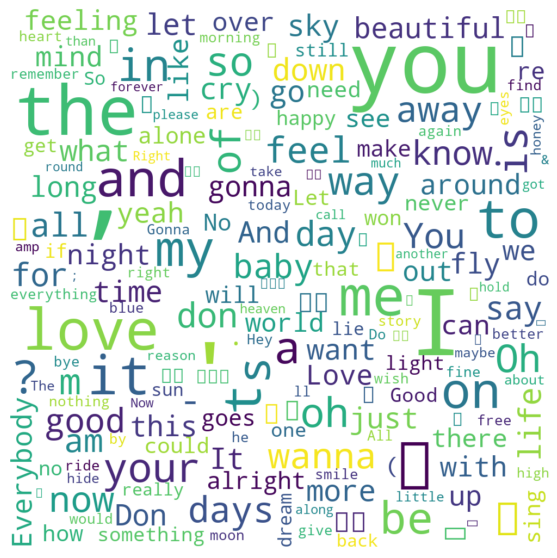

In [143]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()